[*********************100%***********************]  1 of 1 completed
RMSE: 19.754554014279616


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


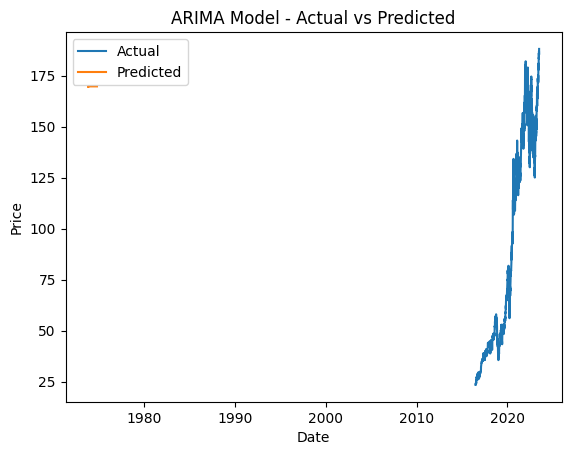

In [2]:
import yfinance as yf
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Download historical data using yfinance
end = datetime.now()
start = datetime(2016, end.month, end.day)
data = yf.download('AAPL', start, end)

# Extract the 'Close' prices
series = data['Close']

# Split the data into train and test sets
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Get the predictions
predictions = model_fit.predict(start=len(train), end=len(series)-1, typ='levels')

# Calculate RMSE
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Plot the actual values and predictions
plt.plot(series.index, series, label='Actual')
plt.plot(predictions.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Model - Actual vs Predicted')
plt.legend()
plt.show()
